In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# <u>**Path A**


## **1.Read in the data**

In [ ]:
clinical_study = pd.read_csv('clinical-study.csv')
clinical_study.head(10)

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N
6,SUBJ_006,63.0,Male,79.33,1.77,CONTROL,Y
7,SUBJ_007,77.0,Male,96.12,1.77,CONTROL,N
8,SUBJ_008,57.0,Male,93.50,1.63,DRUG,N
9,SUBJ_009,72.0,Male,85.57,1.68,DRUG,N


In [ ]:
protein_levels = pd.read_csv('protein-levels.csv')
protein_levels.head(10)

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0
5,SUBJ_006,116.0
6,SUBJ_007,78.0
7,SUBJ_008,115.0
8,SUBJ_009,197.0
9,SUBJ_010,125.0


## **2.Examine the data**

In [ ]:
clinical_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  772 non-null    object 
 1   age         772 non-null    float64
 2   sex         772 non-null    object 
 3   weight      761 non-null    float64
 4   height      772 non-null    float64
 5   trt_grp     772 non-null    object 
 6   RESPONSE    772 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.3+ KB


In [ ]:
clinical_study.describe()

,age,weight,height
count,772.000000,761.000000,772.000000
mean,61.580782,91.110074,1.677462
std,7.866491,22.489547,0.101405
min,7.200000,22.310000,1.193000
25%,57.000000,75.550000,1.600000
50%,62.000000,88.870000,1.670000
75%,67.000000,104.650000,1.760000
max,79.000000,182.500000,1.940000


In [ ]:
protein_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_id         768 non-null    object 
 1   protein_concentration  763 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.1+ KB


In [ ]:
protein_levels.describe()

,protein_concentration
count,763.000000
mean,121.686763
std,30.535641
min,44.000000
25%,99.000000
50%,117.000000
75%,141.000000
max,199.000000


## **3. Clean up the data**


### **a. indexing data by patient ID**

In [ ]:
clinical_study.set_index("subject_id")
clinical_study.head(5)

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


In [ ]:
protein_levels.set_index('participant_id')
protein_levels.head(5)

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


### **b. remove paediatric data**

In [ ]:
#find all rows where age<18
clinical_study[clinical_study['age'] < 18]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N
771,SUBJ_A71,7.854,Male,23.176,1.26343,CONTROL,N


In [ ]:
clinical_study.shape

(772, 7)

The full dataframe has 772 rows and 7 columns

In [ ]:
#drop rows where age<18
clinical_study.drop(clinical_study[clinical_study['age'] < 18].index)

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y
...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y


In [ ]:
#drop rows where age<18 and assign to dataframe variable
clinical_study = clinical_study.drop(clinical_study[clinical_study['age'] < 18].index)
clinical_study.shape

(769, 7)

We can see there are three fewer rows as the three rows identified as meeting the condition *age<18* have been dropped.

### **c. remove missing values**

In [ ]:
# find missing values
clinical_study.isnull().sum()

subject_id     0
age            0
sex            0
weight        11
height         0
trt_grp        0
RESPONSE       0
dtype: int64

In [ ]:
protein_levels.isnull().sum()

participant_id           0
protein_concentration    5
dtype: int64

The two columnms with missing values *'age'* and *protein_concentration* There are many ways to deal with missing values. For example depending on the data and task, we could drop the rows with missing values or replace the missing values with the mean, median, mode, or even a constant value . We can use a box plot or density plot to help decide what method to follow

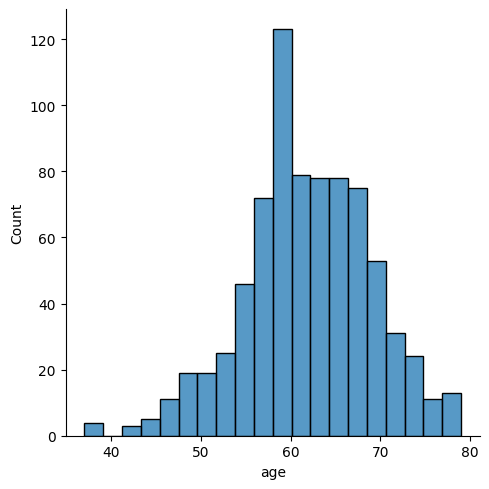

In [ ]:
sns.displot(clinical_study.age)

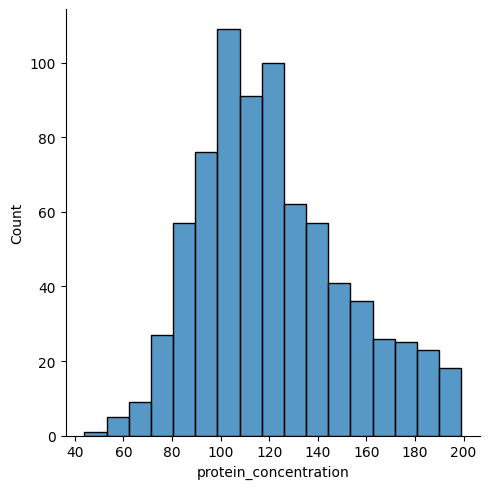

In [ ]:
sns.displot(protein_levels.protein_concentration)

As we can see, the data for age and protein is slighly skewed. Therefore it would be better to use the median to replace the missing values



In [ ]:
# replace missing values in clinical study data
clinical_study = clinical_study.fillna(clinical_study.median())

<ipython-input-105-c310e0486a51>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clinical_study = clinical_study.fillna(clinical_study.median())


In [ ]:
#check to confirm
clinical_study.isnull().sum()

subject_id    0
age           0
sex           0
weight        0
height        0
trt_grp       0
RESPONSE      0
dtype: int64

In [ ]:
# replace missing values in protein levels data
protein_levels = protein_levels.fillna(protein_levels.median())

<ipython-input-107-dbbc80c4d81e>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  protein_levels = protein_levels.fillna(protein_levels.median())


In [ ]:
# check to confirm
protein_levels.isnull().sum()

participant_id           0
protein_concentration    0
dtype: int64

## **4. Create new variables**

### **a. BMI**

BMI is calculated by dividing weight by the square of the height

In [ ]:
clinical_study['bmi'] = clinical_study['weight']/clinical_study['height']**2
clinical_study.head(5)

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,bmi
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,33.487599
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,33.487599
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,26.476056
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,23.338568
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,27.973333


### **b. merge dataframes**

we must first rename the patient id column in one of the dataframes since they are named differently. We will be renaming the 'participant id' column in the protein_levels dataframe

In [ ]:
#before
protein_levels.head(3)

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0


In [ ]:
#after
protein_levels = protein_levels.rename(columns={'participant_id': 'subject_id'})
protein_levels.head(3)

,subject_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0


Now me can merge the two dataframes on the subject id

In [ ]:
#merge and check
df = clinical_study.merge(protein_levels[['subject_id', 'protein_concentration']], on = 'subject_id')
df.head(5)

,subject_id,age,sex,weight,height,trt_grp,RESPONSE,bmi,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,33.487599,148.0
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,33.487599,148.0
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,26.476056,85.0
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,23.338568,183.0
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,27.973333,89.0


## **5. Aggregate the data**


### **a. compare mean age in two treatment groups**

In [ ]:
df.groupby(['trt_grp']).mean()

<ipython-input-113-c25279c7ef74>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['trt_grp']).mean()


,age,weight,height,bmi,protein_concentration
trt_grp,,,,,
CONTROL,61.862338,91.883558,1.675818,32.623955,121.285714
DRUG,61.718750,90.802396,1.682500,31.987363,122.096354


The mean age in the two treatment groups is the same.

### **b.compare mean age in responders vs non-responders**

In [ ]:
df.groupby(['RESPONSE']).mean()

<ipython-input-114-4db4e2ba3557>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['RESPONSE']).mean()


,age,weight,height,bmi,protein_concentration
RESPONSE,,,,,
N,61.712644,89.890529,1.677770,31.840926,134.882759
Y,61.892216,93.236257,1.680958,32.911878,104.508982


The mean age in responders vs non-responders was again the rougly the same.

### **c. compare responders and non-responders in the two treatment arms**

In [ ]:
df.groupby(['RESPONSE','trt_grp']).mean()

<ipython-input-115-f9721286bb15>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['RESPONSE','trt_grp']).mean()


age     weight    height        bmi  \
RESPONSE trt_grp                                              
N        CONTROL  62.042146  89.738889  1.676935  31.838608   
         DRUG     61.218391  90.117989  1.679023  31.844403   
Y        CONTROL  61.483871  96.397742  1.673468  34.276983   
         DRUG     62.133333  91.369476  1.685381  32.105817   

                  protein_concentration  
RESPONSE trt_grp                         
N        CONTROL             128.796935  
         DRUG                144.011494  
Y        CONTROL             105.475806  
         DRUG                103.938095

Both responders and non responders in both the control and drug group were extremely similar in terms of age, weight, and height. However once group that slighlty stood out were the responders in the control group who were heavier and had a higher BMI.

### **d. compare mean weight in responders vs non-responders etc**

In [ ]:
df.groupby(['RESPONSE']).mean()

<ipython-input-116-4db4e2ba3557>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['RESPONSE']).mean()


,age,weight,height,bmi,protein_concentration
RESPONSE,,,,,
N,61.712644,89.890529,1.677770,31.840926,134.882759
Y,61.892216,93.236257,1.680958,32.911878,104.508982


On average, responders were heavier than non responders.

### **e. compare protein concentration in responders vs non responders**

As shown above in part d, non responders tended to have a significantly higher protein concentration

## **6. visualizing the data**

### **i. Boxplot of age(y-axis) by response (x-axis)**

<Axes: xlabel='RESPONSE', ylabel='age'>

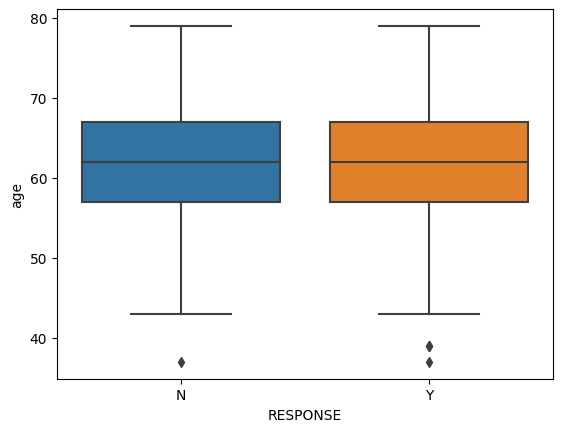

In [ ]:
sns.boxplot(df, x='RESPONSE', y='age')

#### **1. seperated by treatment group**

<Axes: xlabel='RESPONSE', ylabel='age'>

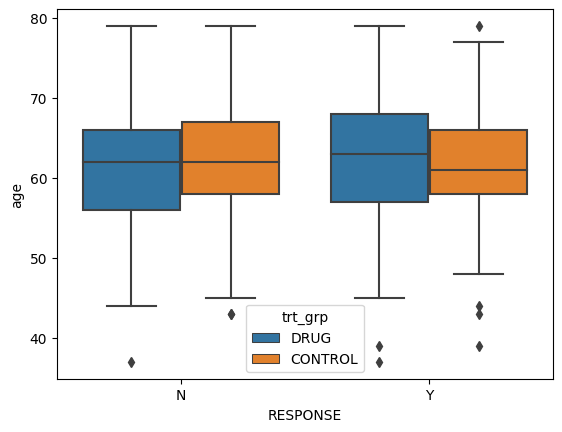

In [ ]:
sns.boxplot(df, x='RESPONSE', y='age', hue='trt_grp')

### **ii. Boxplot of weight/BMI(y-axis) by response (x-axis)**

<Axes: xlabel='RESPONSE', ylabel='bmi'>

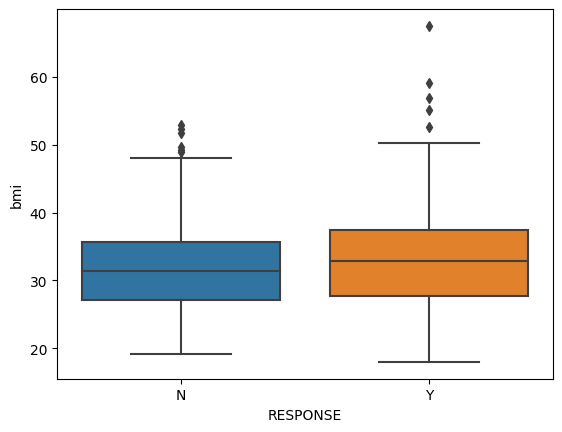

In [ ]:
sns.boxplot(df, x='RESPONSE', y='bmi')

#### **1. seperated by treatment group**

<Axes: xlabel='RESPONSE', ylabel='bmi'>

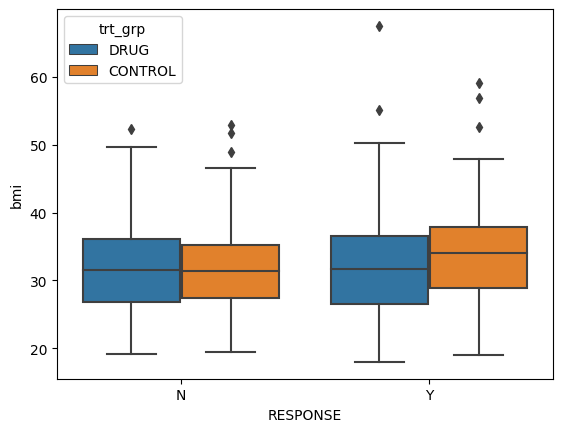

In [ ]:
sns.boxplot(df, x='RESPONSE', y='bmi', hue='trt_grp')

### **iii. Boxplot of protein_concentration(y-axis) by response(x-axis)**


<Axes: xlabel='RESPONSE', ylabel='protein_concentration'>

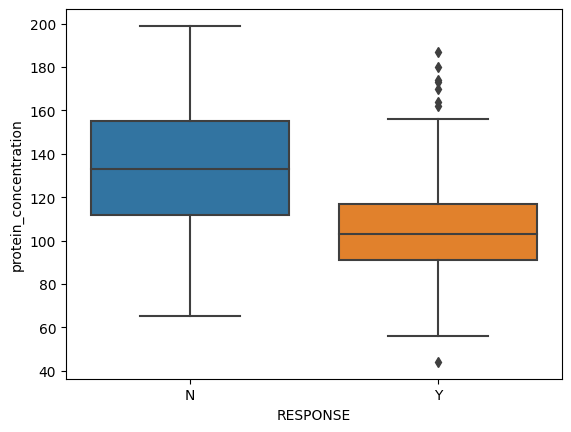

In [ ]:
sns.boxplot(df, x='RESPONSE', y='protein_concentration')

#### **1. Seperated by treatment group**


<Axes: xlabel='RESPONSE', ylabel='protein_concentration'>

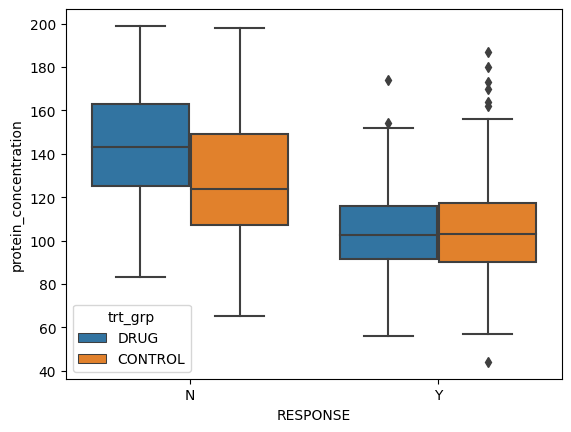

In [ ]:
sns.boxplot(df, x='RESPONSE', y='protein_concentration', hue='trt_grp')

## **7. Modelling (Logistic Regression)**

We will use machine learning to predict whether a patient will response to treatment based on their age, sex, weight, height, trt_grp, bmi, and protein concentration. This is a binary classification task so we will be using a logistic regression although other algorithms such as decision trees, random forests, or support vector machines might be appropriate.

First we prepare the data by splitting it into features(X) and the target variable(y):

In [ ]:
X = df.drop(['RESPONSE', 'subject_id'], axis=1)
y = df['RESPONSE']

In [ ]:
X.head(3)

,age,sex,weight,height,trt_grp,bmi,protein_concentration
0,46.0,Female,84.66,1.59,DRUG,33.487599,148.0
1,46.0,Female,84.66,1.59,DRUG,33.487599,148.0
2,47.0,Female,71.21,1.64,DRUG,26.476056,85.0


In [ ]:
y.head(3)

0    N
1    N
2    Y
Name: RESPONSE, dtype: object

encode categorical variables

In [ ]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['sex', 'trt_grp']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))
encoded_cols.columns = encoder.get_feature_names_out(categorical_columns)

# Drop the original categorical columns from X
X = X.drop(categorical_columns, axis=1)

# Concatenate the encoded categorical columns with X
X_encoded = pd.concat([X, encoded_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_encoded.head(5)

,age,weight,height,bmi,protein_concentration,sex_Male,trt_grp_DRUG
0,46.0,84.66,1.59,33.487599,148.0,0.0,1.0
1,46.0,84.66,1.59,33.487599,148.0,0.0,1.0
2,47.0,71.21,1.64,26.476056,85.0,0.0,1.0
3,48.0,69.85,1.73,23.338568,183.0,0.0,0.0
4,59.0,62.94,1.50,27.973333,89.0,0.0,1.0


We now split the data into training and tests

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(615, 7)
(154, 7)
(615,)
(154,)


scale the features

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Create and train the model

In [ ]:
model = LogisticRegression()  # can replace with different desired model
model.fit(X_train, y_train)

LogisticRegression()

Make predictions on the test set

In [ ]:
y_pred = model.predict(X_test)

Evaluate the performance of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100} %")

Accuracy: 82.46753246753246 %
